In [9]:
import os
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
os.chdir(r"C:\Users\mehul\Time_Series_Analysis")
from predictions import *

In [10]:
df_ethm = predictions("ethereum_price.csv")
df_ethm.data = df_ethm.data.reindex(index=df_ethm.data.index[::-1])

                Open      High       Low     Close     Volume    Market Cap  \
2015-08-07  2.830000  3.540000  2.520000  2.770000   1,64,329             -   
2015-08-08  2.790000  2.800000  0.714725  0.753325   6,74,188  16,79,11,000   
2015-08-09  0.706136  0.879810  0.629191  0.701897   5,32,170   4,26,37,600   
2015-08-10  0.713989  0.729854  0.636546  0.708448   4,05,283   4,31,30,000   
2015-08-11  0.708087  1.130000  0.663235  1.070000  14,63,100   4,27,96,500   

                Mean  
2015-08-07  2.915000  
2015-08-08  1.764512  
2015-08-09  0.729259  
2015-08-10  0.697209  
2015-08-11  0.892831  
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 929 entries, 2015-08-07 to 2018-02-20
Freq: D
Data columns (total 7 columns):
Open          929 non-null float64
High          929 non-null float64
Low           929 non-null float64
Close         929 non-null float64
Volume        929 non-null object
Market Cap    929 

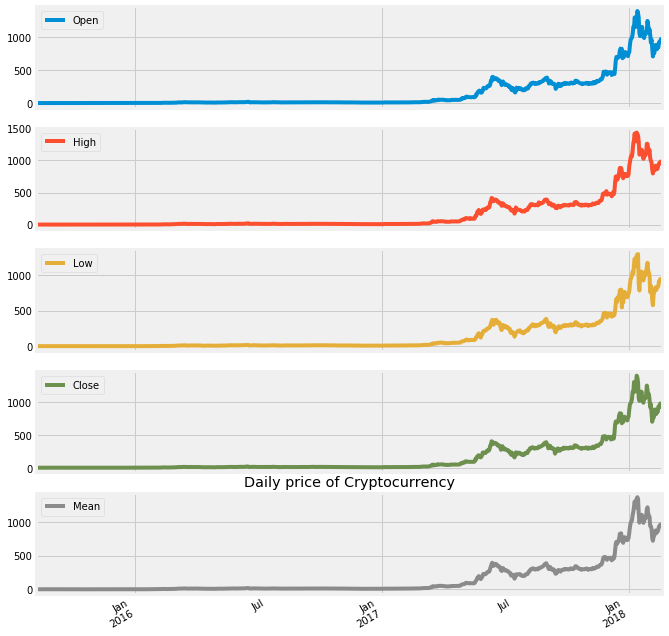

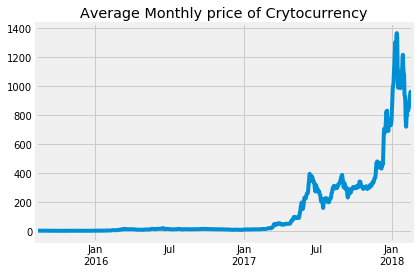

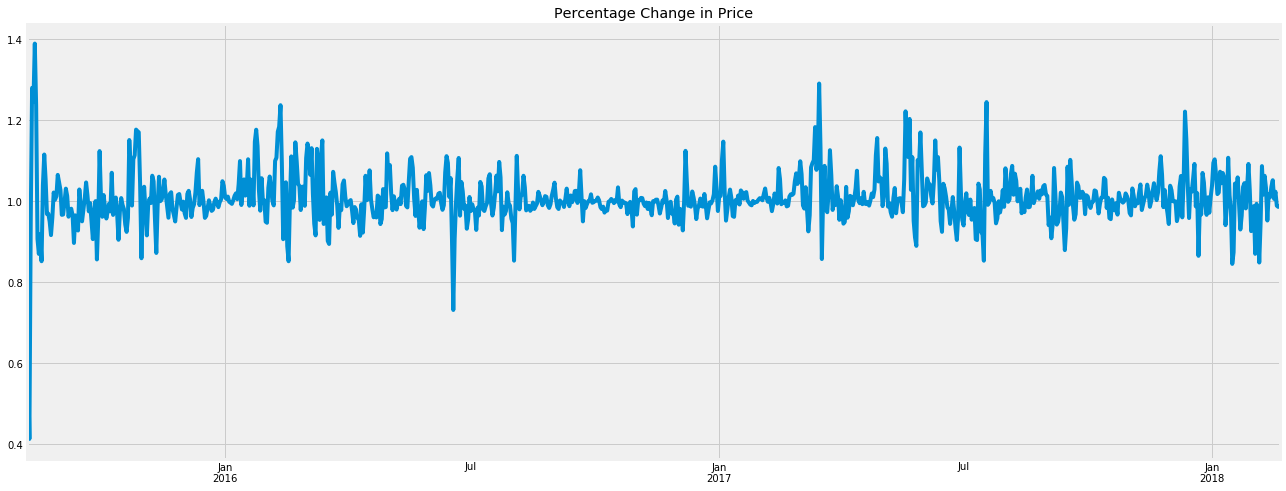

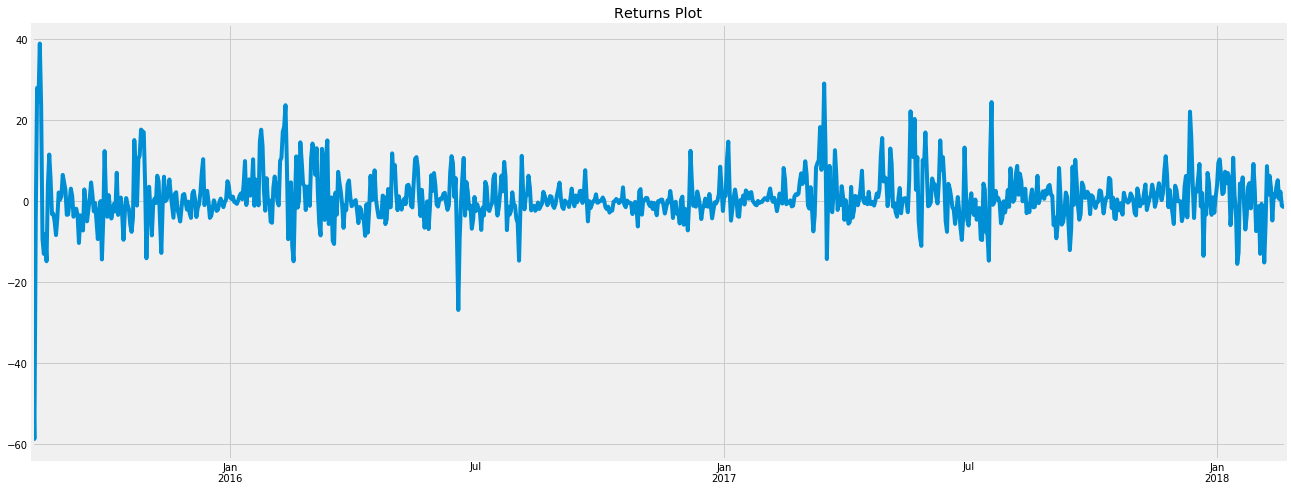

C:\Users\mehul\Time_Series_Analysis\predictions.py:59: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolmean = self.data.Mean.rolling(30).mean()
C:\Users\mehul\Time_Series_Analysis\predictions.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolstd = self.data.Mean.rolling(30).std()


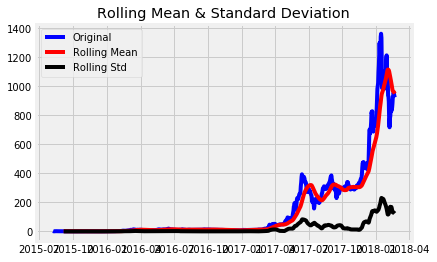

Results of Dickey-Fuller Test
Test Statistic                  -0.927626
p-value                          0.778739
#Lags Used                      19.000000
Number of Observations Used    909.000000
Critical Value(1%)              -3.437564
Critical Value(5%)              -2.864725
Critical Value(10%)             -2.568466
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            2.463973
p-value                   0.010000
Lags Used                21.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                  0.570
P-value                         0.987
Lags                               21
------------------------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [11]:
df_ethm.description()
df_ethm.missing()
df_ethm.plot_daily()
df_ethm.plot_monthly()
df_ethm.Percent_change()
df_ethm.Returns()
df_ethm.stationarity_test()

In [12]:
from Model import *

In [8]:
ethm_ret = model(df_ethm.data)

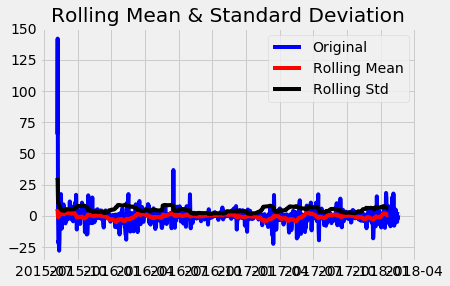

Results of Dickey-Fuller Test
Test Statistic                  -4.237812
p-value                          0.000568
#Lags Used                      18.000000
Number of Observations Used    909.000000
Critical Value(1%)              -3.437564
Critical Value(5%)              -2.864725
Critical Value(10%)             -2.568466
dtype: float64
Results of KPSS Test:
------------------------------------------------------------------------------
Test Statistic            0.290404
p-value                   0.100000
Lags Used                21.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [9]:
ethm_ret.stationarity_test()

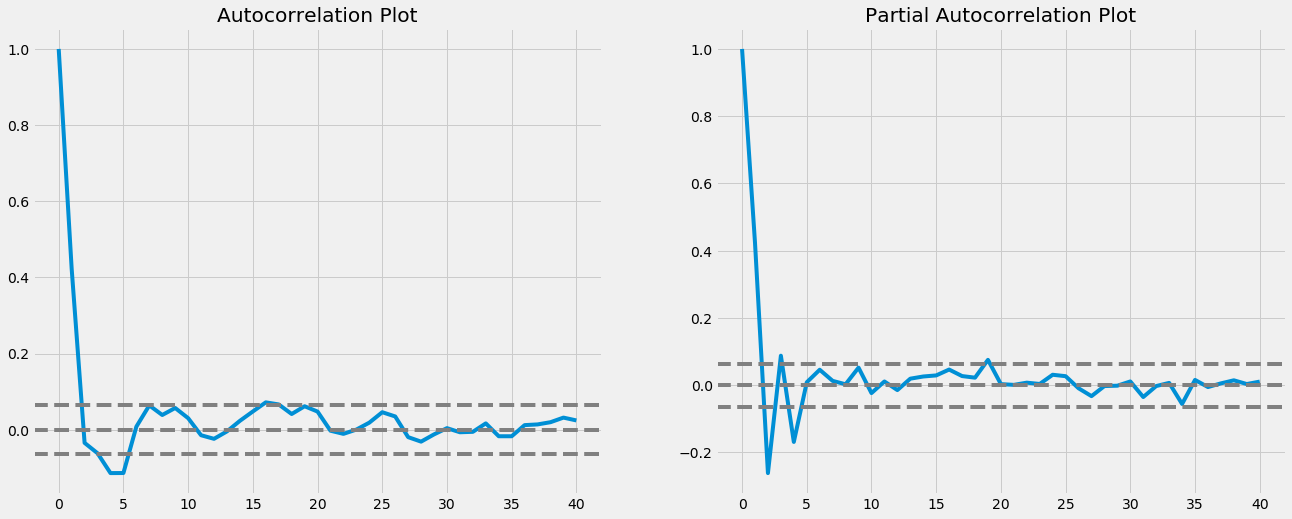

In [10]:
ethm_ret.lags()

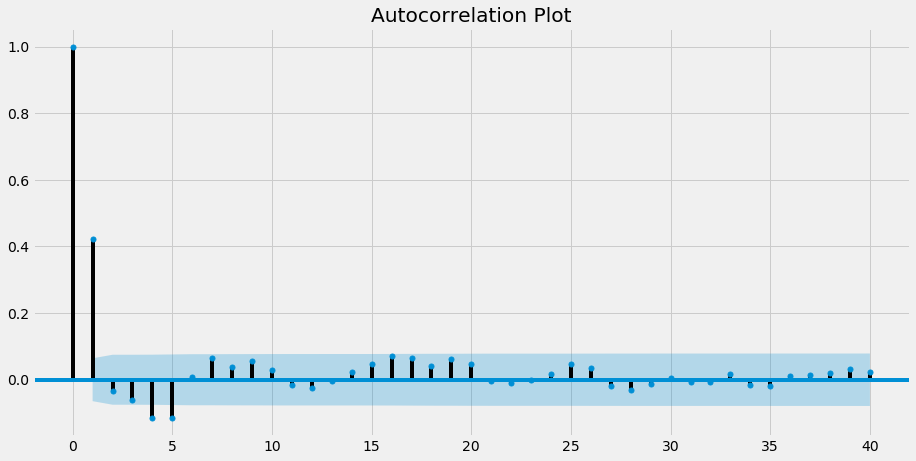

In [11]:
ethm_ret.auto_graphics()

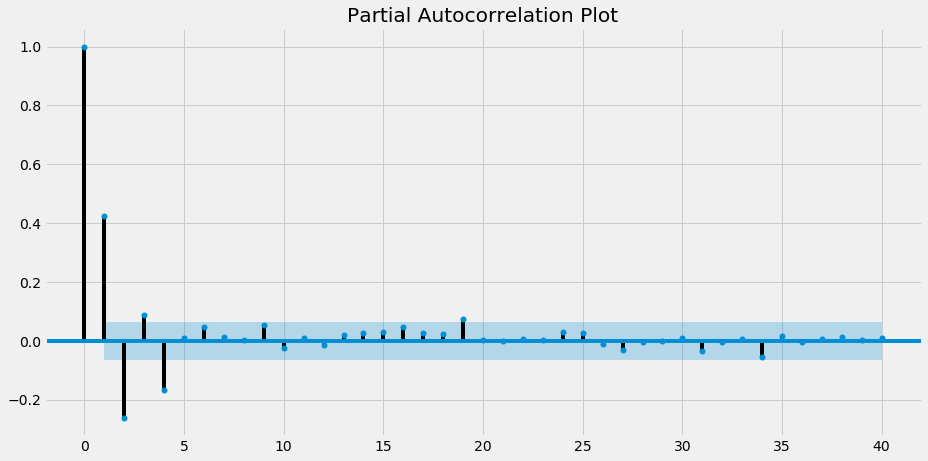

In [12]:
ethm_ret.partial_graphics()

In [13]:
ethm_ret.ARIMA_model(1,1)

                           Results: ARMA
Model:              ARMA             BIC:                 6145.5658 
Dependent Variable: Returns          Log-Likelihood:      -3059.1   
Date:               2019-10-18 17:42 Scale:               1.0000    
No. Observations:   928              Method:              css-mle   
Df Model:           3                Sample:              02-19-2018
Df Residuals:       925                                   08-07-2015
Converged:          1.0000           S.D. of innovations: 6.536     
No. Iterations:     12.0000          HQIC:                6133.608  
AIC:                6126.2337                                       
---------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
---------------------------------------------------------------------
const             -0.3988    0.3315  -1.2027  0.2294  -1.0486  0.2511
ar.L1.Returns     -0.0713    0.0596  -1.1963  0.2319  -0.1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


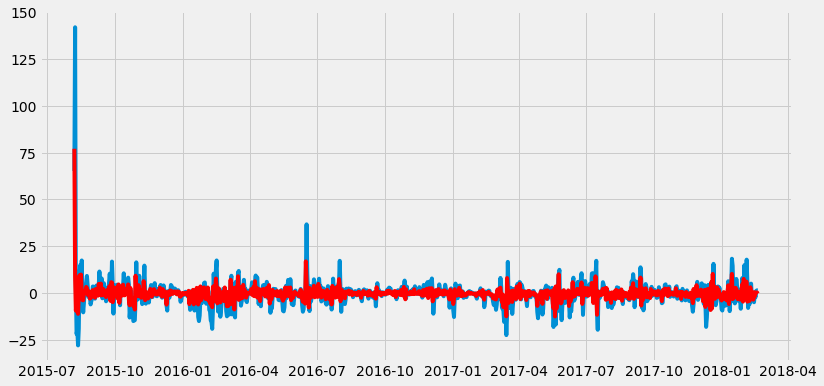

In [14]:
ethm_ret.plot_predict()

In [13]:
df_ethm.data = df_ethm.data['2017-01-01':]

In [7]:
from produce_predict import *
#This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” 
#to find the optimal set of parameters that yields the best performance for our model.
ethm_sarima = produce_predict(df_ethm.data)

In [8]:
ethm_sarima.order()

ARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:6250.810553839616


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:5837.393565719802
ARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:5147.889711867033
ARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:4777.14396537949
ARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:5141.409393114131
ARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:4998.996186640194
ARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:4789.610134065359
ARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC:4779.125267505935
ARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC:5687.6543066254235
ARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC:4980.127736010463
ARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC:4643.308596942414
ARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:4309.888697168042
ARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC:4651.4047990213
ARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC:4502.069450472398
ARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC:4332.251761915446
ARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC:4311.88864428454
ARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC:3909.4895599508586
ARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC:3653.7877641402483
ARIMA(0, 1, 0)x(0, 1, 0, 30) - AIC:3899.8714248801343
ARIMA(0, 1, 0)x(0, 1, 1, 30) - AIC:3431.869275

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 30) - AIC:3669.464974923293
ARIMA(1, 0, 0)x(0, 1, 0, 30) - AIC:3907.5267755210443
ARIMA(1, 0, 0)x(0, 1, 1, 30) - AIC:3442.7824163552245
ARIMA(1, 0, 0)x(1, 0, 0, 30) - AIC:3661.3436009002303
ARIMA(1, 0, 0)x(1, 0, 1, 30) - AIC:3663.265350517426
ARIMA(1, 0, 0)x(1, 1, 0, 30) - AIC:3464.692998603765
ARIMA(1, 0, 0)x(1, 1, 1, 30) - AIC:3437.195034711607
ARIMA(1, 0, 1)x(0, 0, 0, 30) - AIC:3834.9799222007423
ARIMA(1, 0, 1)x(0, 0, 1, 30) - AIC:3588.417675548721
ARIMA(1, 0, 1)x(0, 1, 0, 30) - AIC:3781.097646019503
ARIMA(1, 0, 1)x(0, 1, 1, 30) - AIC:3362.3966467099117
ARIMA(1, 0, 1)x(1, 0, 0, 30) - AIC:3596.739568843678
ARIMA(1, 0, 1)x(1, 0, 1, 30) - AIC:3590.417492408763
ARIMA(1, 0, 1)x(1, 1, 0, 30) - AIC:3389.6363179674654
ARIMA(1, 0, 1)x(1, 1, 1, 30) - AIC:3362.4168162439923
ARIMA(1, 1, 0)x(0, 0, 0, 30) - AIC:3852.645750121906
ARIMA(1, 1, 0)x(0, 0, 1, 30) - AIC:3604.325263553231
ARIMA(1, 1, 0)x(0, 1, 0, 30) - AIC:3812.7758960660153
ARIMA(1, 1, 0)x(0, 1, 1, 30) - AIC:338

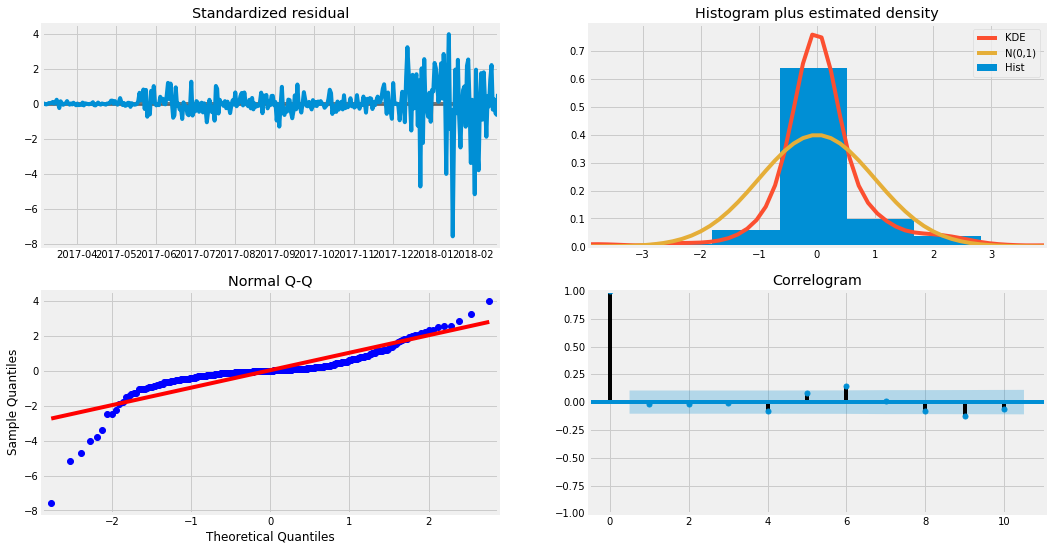

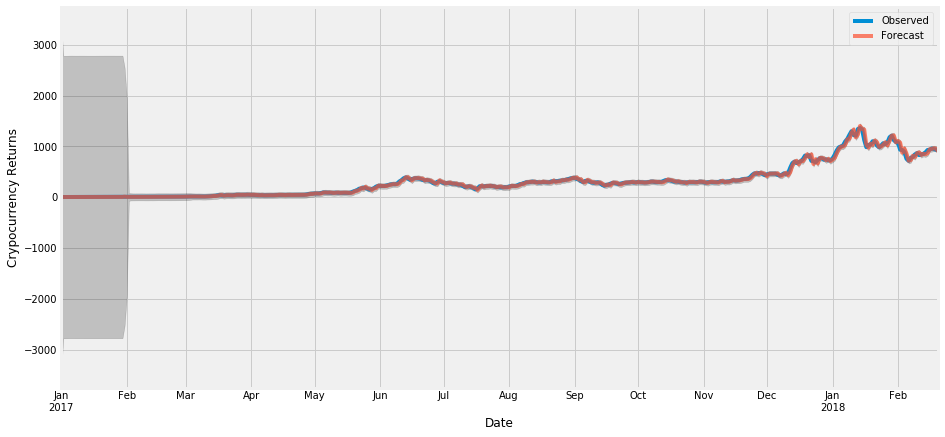

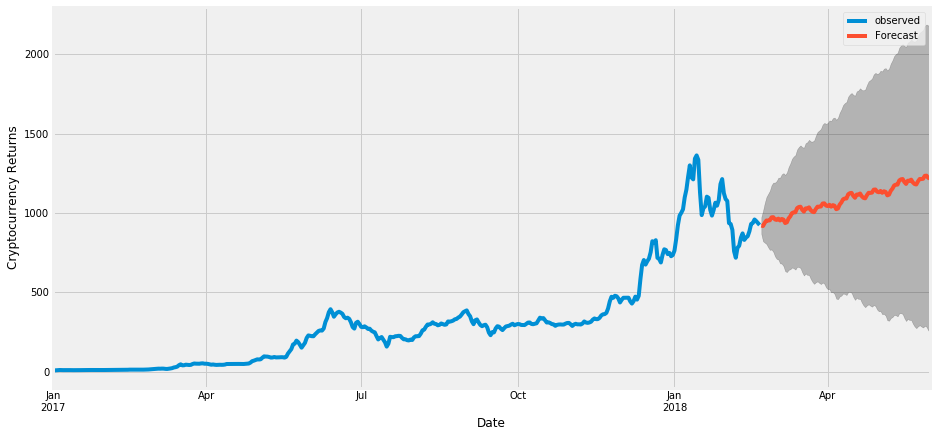

In [9]:
ethm_sarima.sarima_model((0,1,1),(0,1,1,30))
ethm_sarima.diagnostics()
ethm_sarima.pred_vs_actual()
ethm_sarima.produce_forecast()

In [10]:
from fbprophet import Prophet
from prophet_model import *
ethm_pro = prophet_model("ethereum_price.csv",513)

<Figure size 1296x432 with 0 Axes>

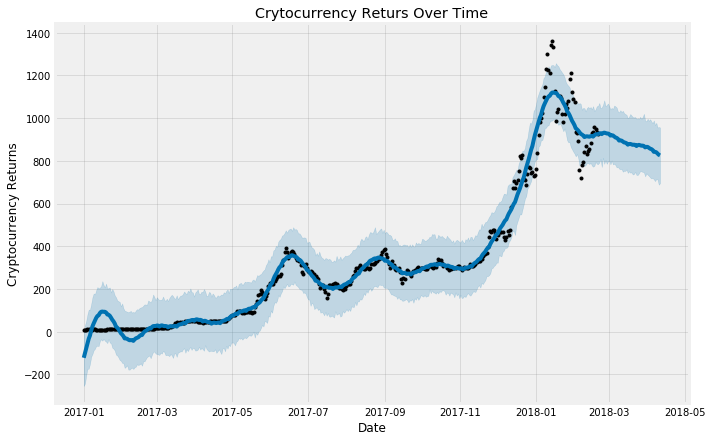

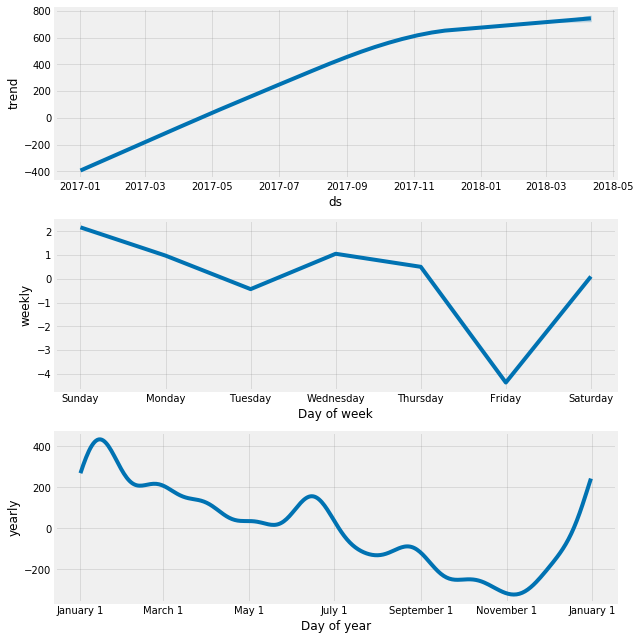

In [11]:
ethm_pro.model()
ethm_pro.forecast()
ethm_pro.Vizualization()

In [6]:
from VaR import *
var = Var(df_ethm.data)

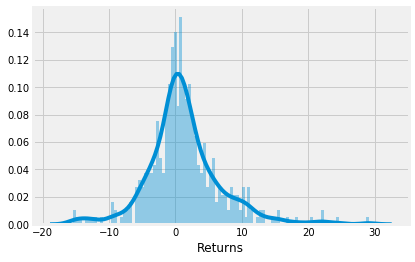

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -5.91973
95%                           -7.96648
99%                          -11.8059


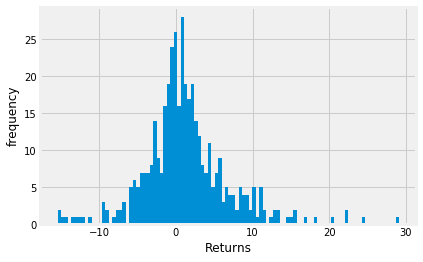

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -4.53214
95%                           -6.56733
99%                          -13.3691


In [7]:
var.var_cov(100)
var.hist_sim(100)

In [8]:
var.monte_carlo()

Simulated VAR is  15.072048661743034
